In [91]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import math
import matplotlib

In [2]:
y_zoom_max =0.000001
y_zoom_min = -0.000001

In [3]:
#colourscheme
sns.color_palette()
##the font size in graphs
plt.rcParams.update({'font.size': 15})

In [4]:
file_stem_of_interest="trk"

In [5]:
folderfiles = os.listdir()

In [6]:
files_of_interest = []

In [7]:
for x in folderfiles:
    if x.startswith(file_stem_of_interest) and not x.endswith(".png"):
        if os.path.isfile(x):
            files_of_interest.append(x)

In [8]:
list_of_data = []


for x in files_of_interest:
    df=pd.read_csv(x, header = 10, delimiter = '\t', index_col=False, lineterminator = '\n')
    list_of_data.append([x,df])

In [9]:
if "Graphs" not in folderfiles:
     os.makedirs("Graphs")

In [10]:
list_of_data[0][1]

,Bias Voltage S-D (V),Gate Voltage (V),Drain Current (A),Gate Current(A)
0,24.9990,0.00000,6.402160e-07,0.000085
1,24.9990,1.99946,6.655650e-07,0.000056
2,24.9992,3.99940,6.857660e-07,0.000031
3,24.9992,5.99946,7.036090e-07,0.000008
4,24.9992,7.99944,7.199100e-07,0.000000
5,24.9992,9.99983,7.342730e-07,0.000031
6,24.9992,11.99990,7.486080e-07,0.000002
7,24.9992,13.99990,7.614010e-07,0.000000
8,24.9991,15.99910,7.733540e-07,0.000000
9,24.9993,17.99970,7.845560e-07,0.000000


In [11]:
Combined_data_frame_list = []
negative_data_frame_list = []
postive_data_frame_list = []
added_names = []
for x in list_of_data:
    if '-n' in x[0]:
        
        split_name = x[0].split('-')
        new_name = ''
        counter = 0
        for y in split_name:
            
            if counter == 0:
                new_name += y
            elif 'n' != y[0]:
                new_name += '-' + y
            else:
                if '.' in y:
                    z = y.split('.')
                    new_name += '.' + z[1]
            counter += 1
        addingframe = x[1].drop('Bias Voltage S-D (V)', axis=1)
        addingframe = addingframe.round({"Gate Voltage (V)":1})     
        addingframe["Gate Voltage (V)"] = - addingframe["Gate Voltage (V)"]
        negative_data_frame_list.append([new_name, addingframe]) 
    if '-p' in x[0]:
        split_name = x[0].split('-')
        new_name = ''
        counter = 0
        for y in split_name:
            
            if counter == 0:
                new_name += y
            elif 'p' !=  y[0]:
                new_name += '-' + y
            else:
                if '.' in y:
                    z = y.split('.')
                    new_name += '.' + z[1]
            counter += 1
        addingframe = x[1].drop('Bias Voltage S-D (V)', axis=1)
        addingframe = addingframe.round({"Gate Voltage (V)":1})     
        postive_data_frame_list.append([new_name, addingframe]) 
added_names = []       
for x in postive_data_frame_list:
    added_postive =  False
    for y in negative_data_frame_list:
        if x[0] == y[0]:
            addingframe = pd.concat([x[1],y[1]])
            addingframe = addingframe.rename({"Drain Current (A)": x[0][0:-4] + " Drain Current (A)", "Gate Current(A)": x[0][0:-4] + " Gate Current(A)"}, axis =1)
            addingframe = addingframe.set_index("Gate Voltage (V)")
            Combined_data_frame_list.append([x[0],addingframe])
            added_names.append(x[0])
            added_postive =True
    if added_postive ==  False:
            addingframe = x[1]
            addingframe = addingframe.rename({"Drain Current (A)": x[0][0:-4] + " Drain Current (A)", "Gate Current(A)": x[0][0:-4] + " Gate Current(A)"}, axis =1)
            addingframe = addingframe.set_index("Gate Voltage (V)")
            added_names.append(x[0])
            Combined_data_frame_list.append([y[0],addingframe])
for x in negative_data_frame_list:
    if x[0] not in added_names:
            addingframe = x[1]
            addingframe = addingframe.rename({"Drain Current (A)": x[0][0:-4] + " Drain Current (A)", "Gate Current(A)": x[0][0:-4] + " Gate Current(A)"}, axis =1)
            addingframe = addingframe.set_index("Gate Voltage (V)")
            added_names.append(x[0])
            Combined_data_frame_list.append([x[0],addingframe])
            

In [12]:
new_data_frame = pd.DataFrame()


for x in reversed(Combined_data_frame_list):
    new_data_frame = x[1].join(new_data_frame)

#    New_data_frame = pd.merge(addingframe, new_data_frame)

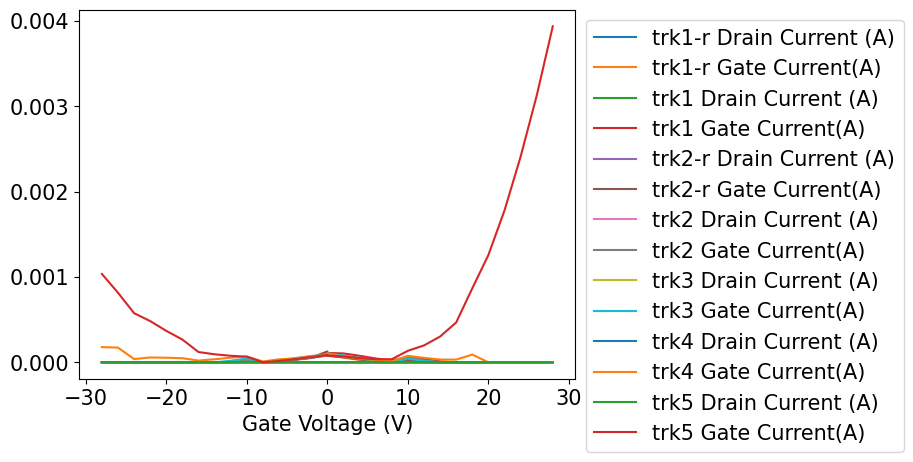

In [13]:
new_data_frame.plot()
plt.legend(bbox_to_anchor=(1,1))
plt.savefig('./Graphs/all.png', bbox_inches='tight')

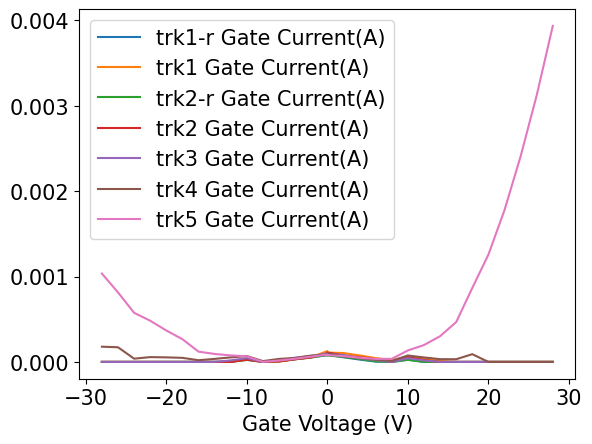

In [14]:
new_data_frame.filter(like = "Gate", axis = 1).plot()
plt.savefig('./Graphs/Gate.png', bbox_inches='tight')

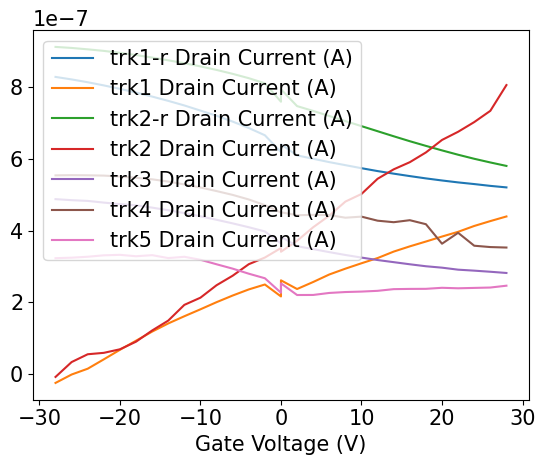

In [15]:
new_data_frame.filter(like = "Drain", axis = 1).plot()
plt.savefig('./Graphs/Drain.png', bbox_inches='tight')

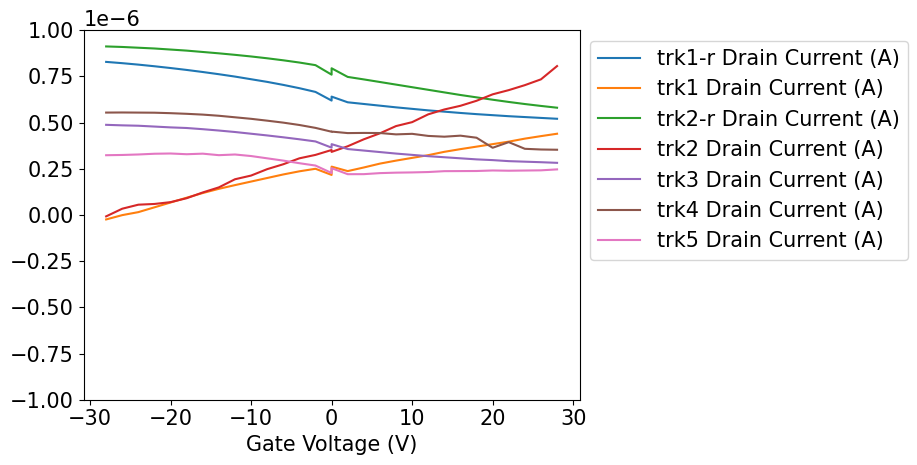

In [16]:
new_data_frame.filter(like = "Drain", axis = 1).plot(ylim =(y_zoom_min,y_zoom_max))
plt.legend(bbox_to_anchor = (1,1))

plt.savefig('./Graphs/Drain-2.png', bbox_inches='tight')

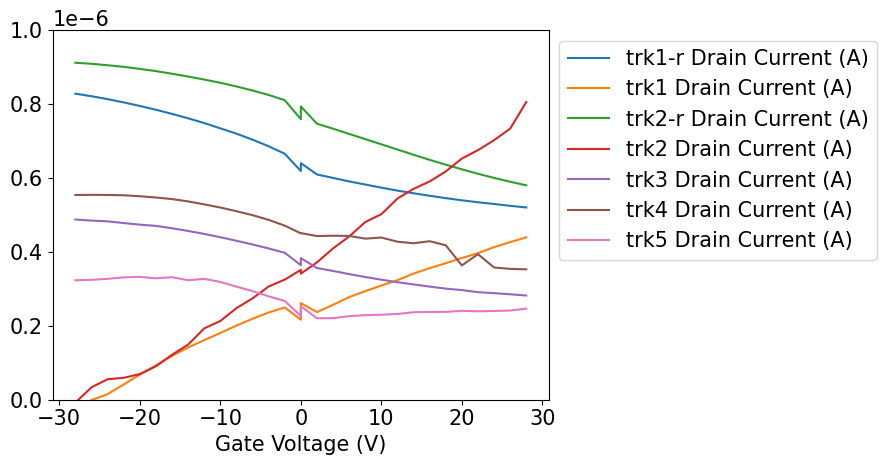

In [17]:
new_data_frame.filter(like = "Drain", axis = 1).plot(ylim =(0,y_zoom_max))
plt.legend(bbox_to_anchor = (1,1))

plt.savefig('./Graphs/Drain-3.png', bbox_inches='tight')

In [65]:
new_data_frame.columns

Index(['trk1-r Drain Current (A)', 'trk1-r Gate Current(A)',
       'trk1 Drain Current (A)', 'trk1 Gate Current(A)',
       'trk2-r Drain Current (A)', 'trk2-r Gate Current(A)',
       'trk2 Drain Current (A)', 'trk2 Gate Current(A)',
       'trk3 Drain Current (A)', 'trk3 Gate Current(A)',
       'trk4 Drain Current (A)', 'trk4 Gate Current(A)',
       'trk5 Drain Current (A)', 'trk5 Gate Current(A)'],
      dtype='object')

In [69]:
rename_map = {"trk1-r Drain Current (A)" : "30 um",  "trk2-r Drain Current (A)": "40 um", "trk3 Drain Current (A)": "50 um", "trk4 Drain Current (A)": "60 um", "trk5 Drain Current (A)": "80 um"}

In [97]:
rename_map

{'trk1-r Drain Current (A)': '30 um',
 'trk2-r Drain Current (A)': '40 um',
 'trk3 Drain Current (A)': '50 um',
 'trk4 Drain Current (A)': '60 um',
 'trk5 Drain Current (A)': '80 um'}

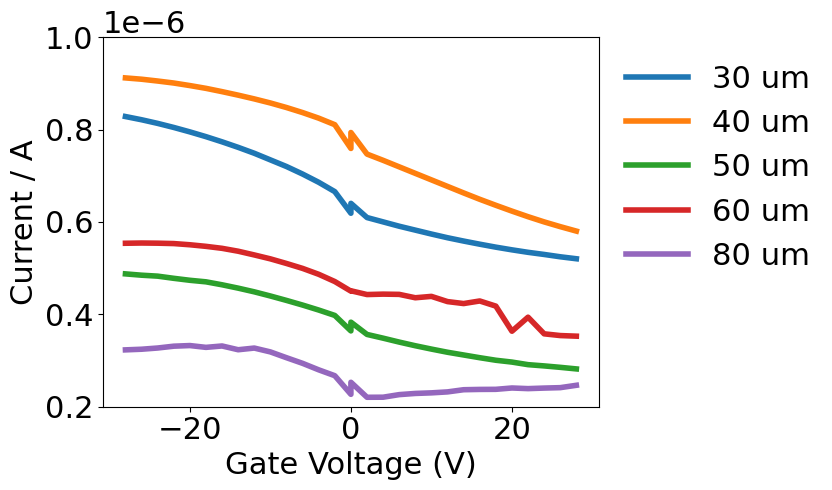

In [125]:
matplotlib.rcParams.update({'font.size': 22})
x = new_data_frame.filter(like = "Drain", axis = 1).drop(["trk1 Drain Current (A)","trk2 Drain Current (A)"],axis=1).rename(rename_map,axis=1).plot(ylim =(0.0000002,y_zoom_max),linewidth=4)
plt.linewidth=1
plt.ylabel("Current / A")
plt.legend(bbox_to_anchor = (1,1), frameon = False)
#.get_frame().set_alpha(None)


plt.savefig('./Graphs/Drain-publication.svg', bbox_inches='tight')
plt.savefig('./Graphs/Drain-publication.png', bbox_inches='tight', transparent=True)

In [19]:
new_data_frame.columns

Index(['trk1-r Drain Current (A)', 'trk1-r Gate Current(A)',
       'trk1 Drain Current (A)', 'trk1 Gate Current(A)',
       'trk2-r Drain Current (A)', 'trk2-r Gate Current(A)',
       'trk2 Drain Current (A)', 'trk2 Gate Current(A)',
       'trk3 Drain Current (A)', 'trk3 Gate Current(A)',
       'trk4 Drain Current (A)', 'trk4 Gate Current(A)',
       'trk5 Drain Current (A)', 'trk5 Gate Current(A)'],
      dtype='object')

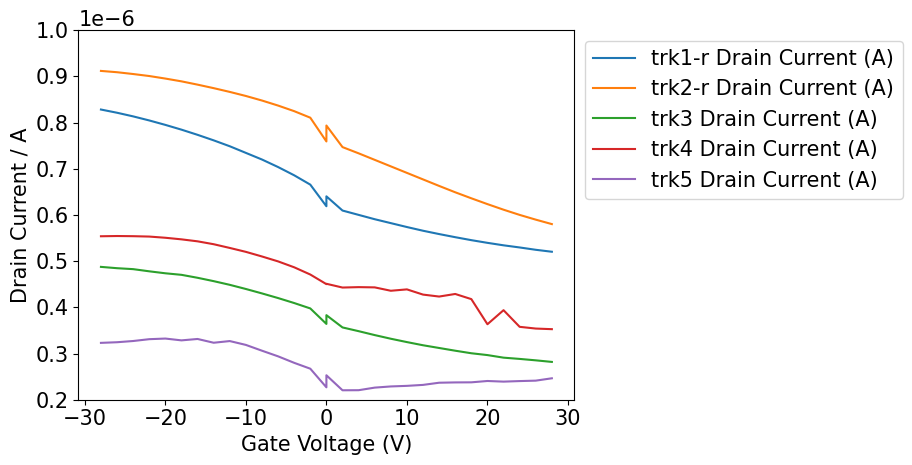

In [20]:
new_data_frame.filter(like = "Drain", axis = 1).drop(['trk1 Drain Current (A)','trk2 Drain Current (A)'], axis=1).plot(ylim =(0.0000002,y_zoom_max))
plt.legend(bbox_to_anchor = (1,1))
plt.ylabel('Drain Current / A')

plt.savefig('./Graphs/Drain-presentation.png', bbox_inches='tight')

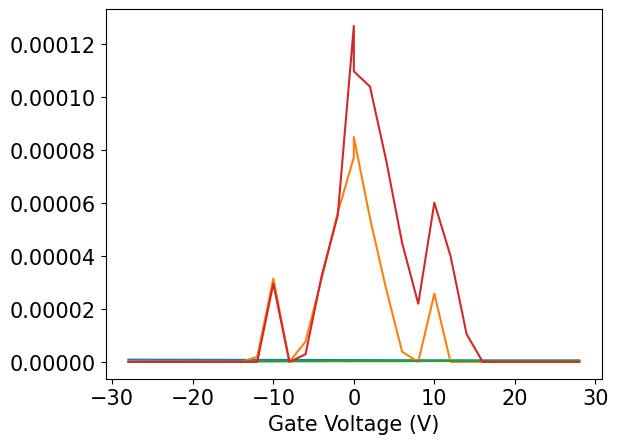

In [21]:
new_data_frame.filter(like = "trk1", axis = 1).plot(legend =False)
plt.savefig('./Graphs/trk1.png')

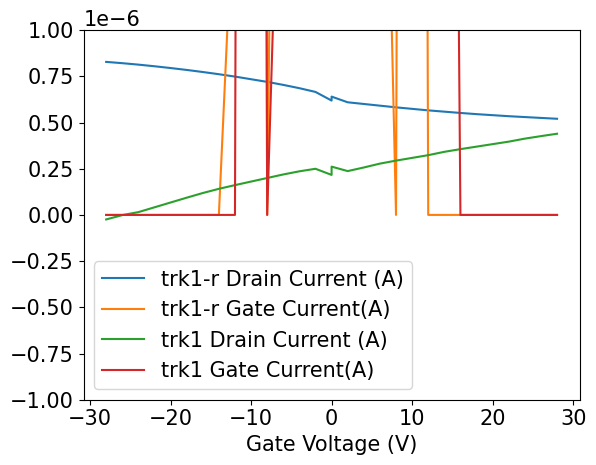

In [22]:
new_data_frame.filter(like = "trk1", axis = 1).plot(ylim = (y_zoom_min,y_zoom_max))
plt.savefig('./Graphs/trk1.png')

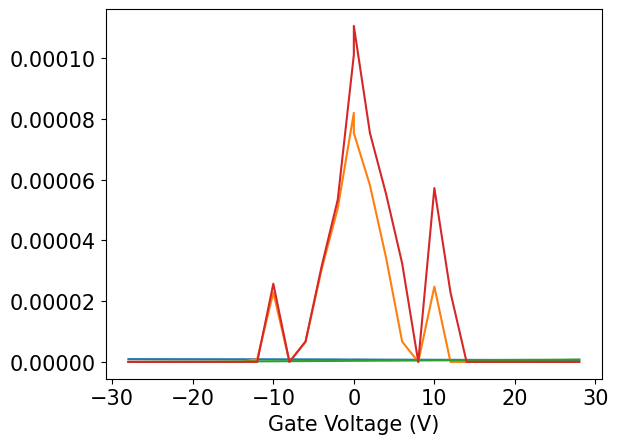

In [23]:
new_data_frame.filter(like = "trk2", axis = 1).plot(legend =False)
plt.savefig('./Graphs/trk2.png')

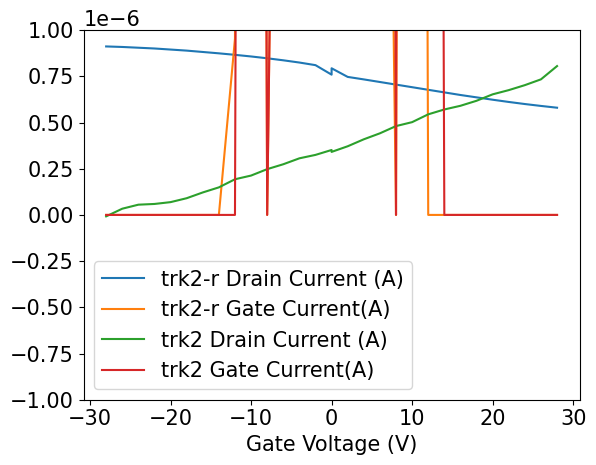

In [24]:
new_data_frame.filter(like = "trk2", axis = 1).plot(ylim = (y_zoom_min,y_zoom_max))
plt.savefig('./Graphs/trk2-2.png')

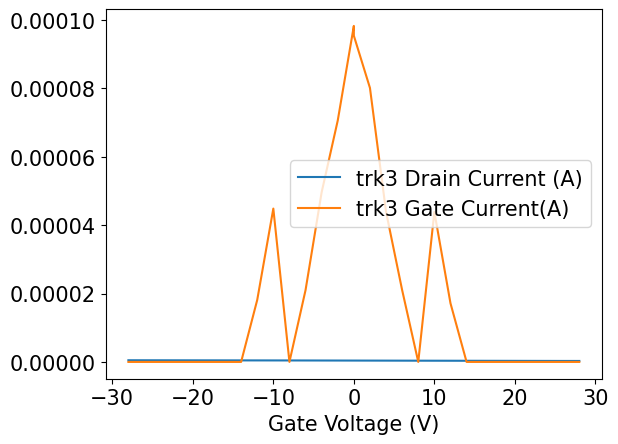

In [25]:
new_data_frame.filter(like = "trk3", axis = 1).plot(legend=True)
plt.savefig('./Graphs/trk3.png')

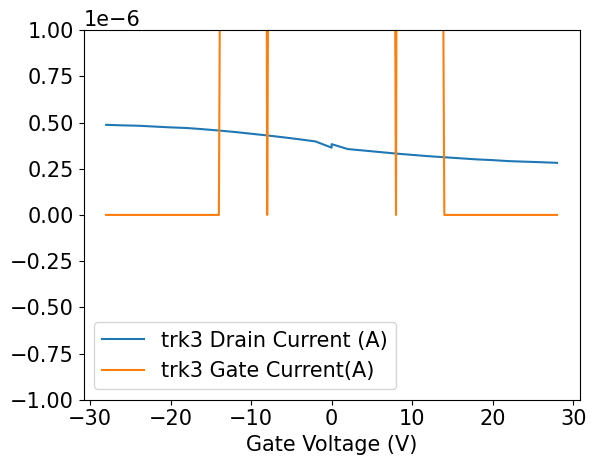

In [26]:
new_data_frame.filter(like = "trk3", axis = 1).plot(legend=True,ylim = (y_zoom_min,y_zoom_max))
plt.savefig('./Graphs/trk3-2.png')

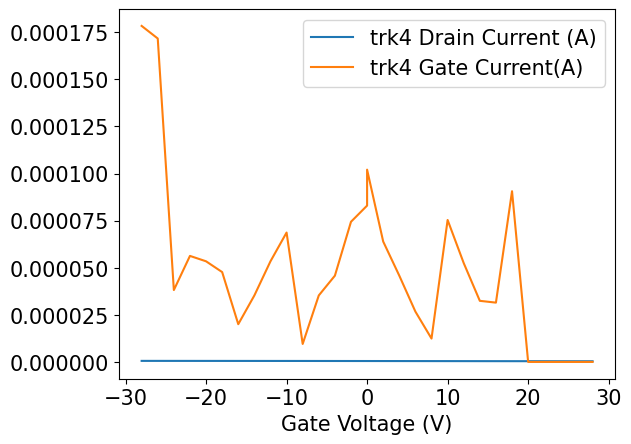

In [27]:
new_data_frame.filter(like = "trk4", axis = 1).plot()
plt.savefig('./Graphs/trk4.png')

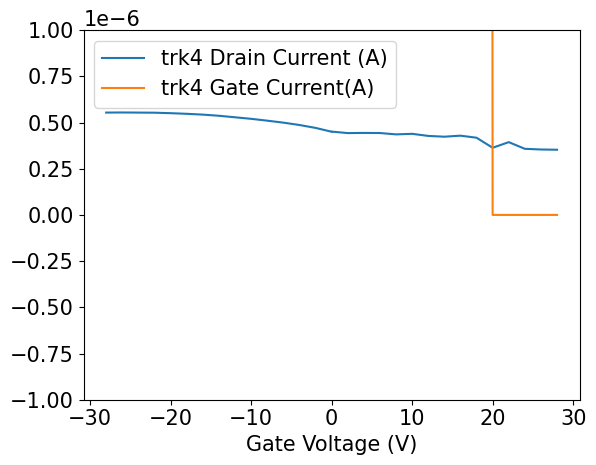

In [28]:
new_data_frame.filter(like = "trk4", axis = 1).plot(legend=True,ylim = (y_zoom_min,y_zoom_max))
plt.savefig('./Graphs/trk4-2.png')

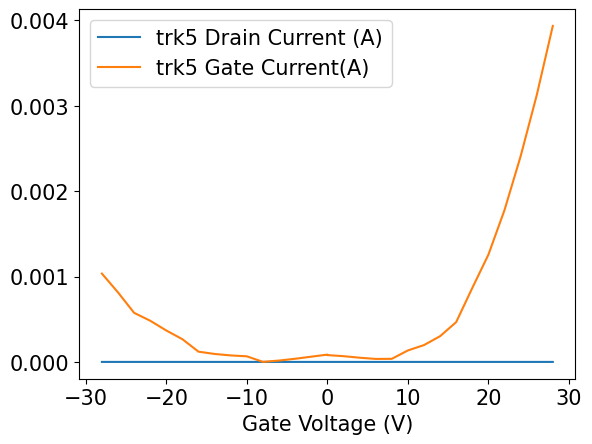

In [29]:
new_data_frame.filter(like = "trk5", axis = 1).plot()
plt.savefig('./Graphs/trk5.png')

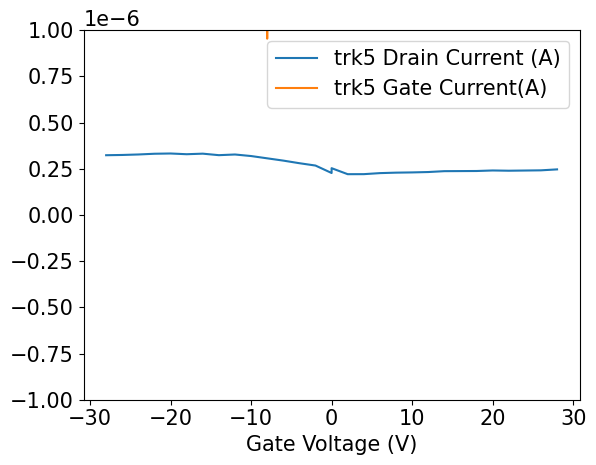

In [30]:
new_data_frame.filter(like = "trk5", axis = 1).plot(ylim = (y_zoom_min,y_zoom_max))
plt.savefig('./Graphs/trk5-2.png')